<center> <h1>Brachidontes</h1> </center> 
<h2>Descripción del Dataset</h2>
<h3>`Brachidontes.csv`</h3>
Describir ......

- **Estación,** ejemplo: 'Invierno'
- **Lugar,** ejemplo: 'MDQ 2 jul-15', el primer código corresponde al lugar: 'MDQ 2', el segundo códico: 'jul-15', corresponde a la fecha en la que se recogió la muestra 
- **Id,** ejemplo:'1', corresponde . . . . ?? 
- **longitud,** ejemplo: '12,1', corresponde a la longitud del brachidonte en PONER UNIDADES
- **ancho,** ejemplo: '7,1', corresponde al ancho del brachidonte en PONER UNIDADES
- **alto,** ejemplo: '5,37',orresponde al alto del brachidonte en PONER UNIDADES
- **peso-hum,** ejemplo: '0,273', DESCRIBIR
- **peso-sin-val,** ejemplo: '0,064'DESCRIBIR
- **peso-seco,** ejemplo: '0,1321' DESCRIBIR 
- **longitu_menor_ 4mm,** ejemplo: '120', corresponde a los brachidontes con una longitud menor a 4mm 





In [5]:
# LECTURA DE LOS DATOS 
# "Brachidontes.csv"  data frame heterogéneo: 
#       Estacion           Lugar  Id longitud ancho  alto peso.hum peso.sin.val
#      invierno    MDQ 1 Jul-15   1    10.19  9.69  8.16   0.8140       0.2110
library(stats)
library(dplyr)
library("ggplot2")
data <- read.csv(file="Brachidontes_final.csv", header=TRUE, sep=",")
head(data)
#print(names(data))
#print(length(data))
#print(class(data))
#print(dim(data))

,Estacion,lugar,Id,longitud,ancho,alto,peso_hum,peso_sin_val,peso_seco,peso_seco_vis,peso_sec_val,longitu_menor_4mm
,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,invierno,MDQ 2,1,15.90,7.10,5.37,0.273,0.064,0.1321,0.0137,0.1184,150
2,invierno,MDQ 2,2,15.60,6.76,6.72,0.344,0.045,0.1892,0.0197,0.1695,150
3,invierno,MDQ 2,3,14.06,6.98,5.10,0.247,0.063,0.1243,0.0129,0.1114,150
4,invierno,MDQ 2,4,16.21,7.21,5.72,0.285,0.071,0.1464,0.0152,0.1312,150
5,invierno,MDQ 2,5,15.10,7.29,5.44,0.317,0.061,0.1395,0.0145,0.1250,150
6,invierno,MDQ 2,6,16.50,7.55,6.35,0.354,0.038,0.1829,0.0190,0.1639,150


# Winter : All Places

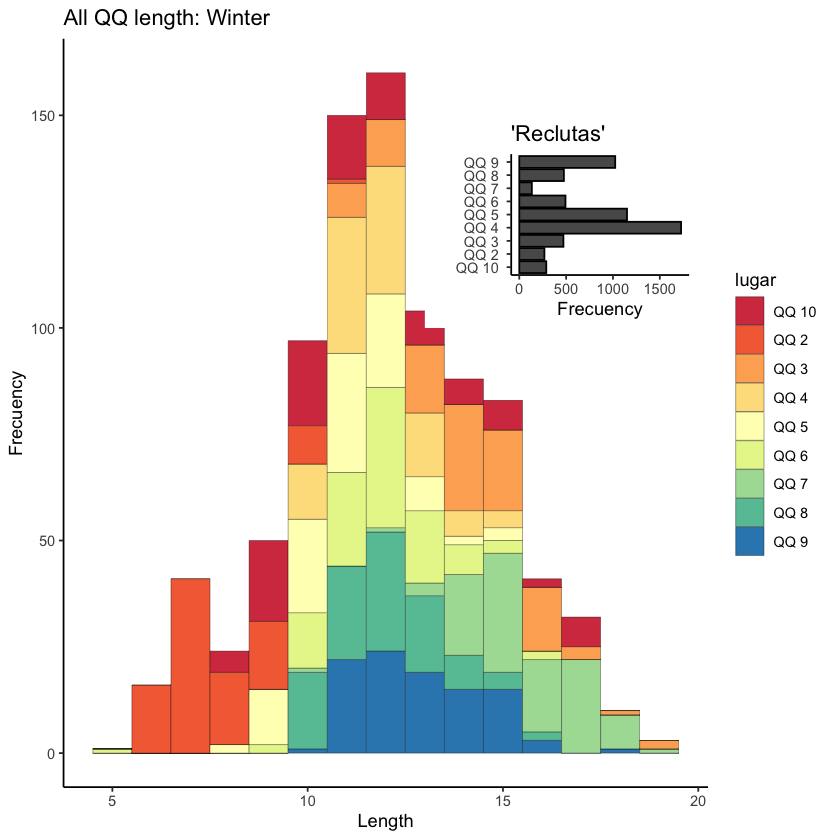

In [6]:
MDQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('QQ', data$lugar) )

reclutas  <-  MDQ_invierno %>% group_by(lugar) %>% count(longitu_menor_4mm)
reclutas["LesThan4"] <- NA
reclutas$LesThan4 <- "les than 4"


#pdf("BORRAR.pdf") 
if(FALSE){
numeroReclutas  <- 125
t2.rect1 <- data.frame (xmin=0, xmax=4, ymin=0, ymax=numeroReclutas/5)
ggplot(MDQ_invierno, aes(x=longitud)) +
     geom_histogram(colour="black", fill="white",bins=30)+
     geom_rect(data=t2.rect1, aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax), fill="orange", alpha=0.6, inherit.aes = FALSE)+
     scale_y_continuous(sec.axis = sec_axis(~.*5, name = "Frecuency Recruits")) +
    labs(x = "Length", y = "Frecuency", title = "Winter: QQ 2") +
    theme(axis.text.y.right = element_text(color = "orange"),
         axis.title.y.right = element_text(color='orange'))   
}    


theme_set(theme_classic())
g <- ggplot(MDQ_invierno, aes(longitud)) + scale_fill_brewer(palette = "Spectral")

d  <- g + geom_histogram(aes(fill=lugar), 
                   binwidth = 1,
                   col="black", 
                   size=.1) +  # change binwidth
                   labs(x = "Length", y = "Frecuency", title="All QQ length: Winter") 


p  <- ggplot(reclutas, aes( y=longitu_menor_4mm, x=lugar)) + 
    geom_bar(position="dodge", stat="identity",col="black")+
    labs(x = "", y = "Frecuency", title="'Reclutas'") +guides(fill = FALSE, labs = FALSE)+
    coord_flip()


d + annotation_custom(ggplotGrob(p), xmin = 13, xmax = 20, 
                       ymin = 100, ymax = 150)


    
#dev.off() 


# Spring : All Places

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



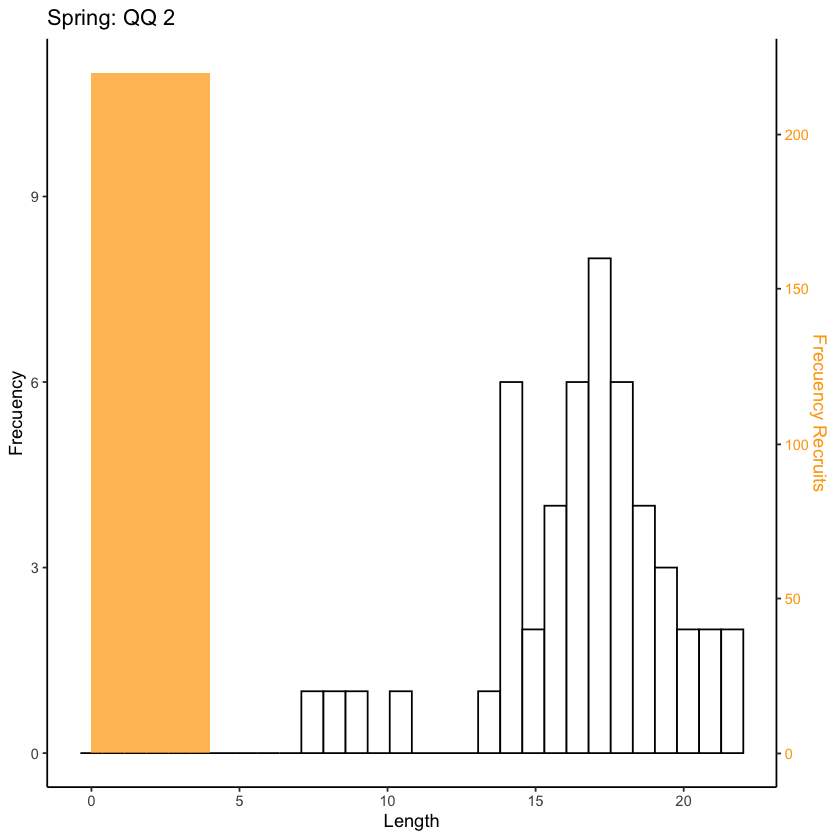

In [10]:
MDQ_invierno <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('MDQ 10', data$lugar) )
numeroReclutas  <- 220
t2.rect1 <- data.frame (xmin=0, xmax=4, ymin=0, ymax=numeroReclutas/20)
#pdf("frecuencia_prim_QQ_5.pdf") 
ggplot(MDQ_invierno, aes(x=longitud)) + 
     geom_histogram(colour="black", fill="white")+
     geom_rect(data=t2.rect1, aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax), fill="orange", alpha=0.7, inherit.aes = FALSE)+
     scale_y_continuous(sec.axis = sec_axis(~.*20, name = "Frecuency Recruits")) +
    labs(x = "Length", y = "Frecuency", title = "Spring: QQ 2") +
    theme(axis.text.y.right = element_text(color = "orange"),
         axis.title.y.right = element_text(color='orange'))
    
#dev.off()

,estacion,sitio,Pobl_total,area,densidad,X,X.1,X.2,X.3
,<fct>,<fct>,<int>,<int>,<dbl>,<lgl>,<lgl>,<fct>,<dbl>
1,invierno,MDQ 2,401,25,16.04,NA,NA,,NA
2,invierno,MDQ 3,603,25,24.12,NA,NA,promedio mdq inv,19.868571
3,invierno,MDQ 4,505,25,20.20,NA,NA,promedio qq inv,65.256000
4,invierno,MDQ 5,298,25,11.92,NA,NA,promedio mdq prim,10.752000
5,invierno,MDQ 6,185,25,7.40,NA,NA,promedio qq prima,21.024000
6,invierno,MDQ 7,764,25,30.56,NA,NA,primedio cam prim,7.804444


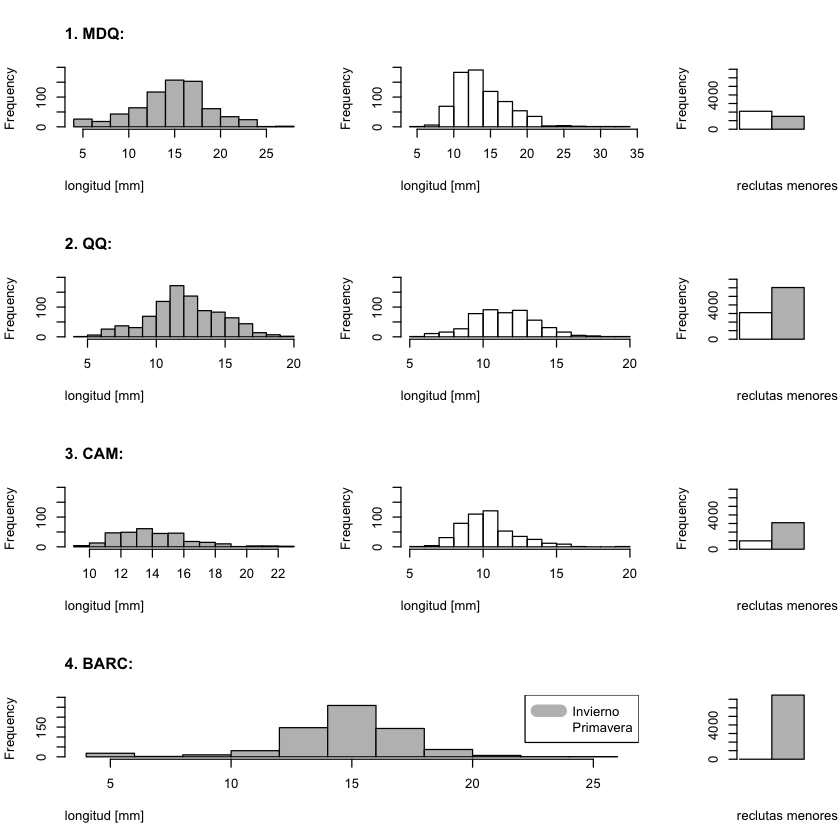

In [18]:
MDQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('QQ', data$lugar))
CAM_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('CAM', data$lugar))
BARC_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('BARC', data$lugar) )

MDQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('QQ', data$lugar))
CAM_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('CAM', data$lugar))
BARC_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('BARC', data$lugar) )
#################### RECLUTAS #######################################################
#MDQ
longitud_reclutas_primavera_MDQ  <- c(2093)
longitud_reclutas_invierno_MDQ <- c(1502)
reclutas_MDQ  <- data.frame(longitud_reclutas_primavera_MDQ, longitud_reclutas_invierno_MDQ)

#QQ
longitud_reclutas_primavera_QQ  <- c(3098)
longitud_reclutas_invierno_QQ <- c(6031)
reclutas_QQ  <- data.frame(longitud_reclutas_primavera_QQ, longitud_reclutas_invierno_QQ)

#CAM
longitud_reclutas_primavera_CAM  <- c(975)
longitud_reclutas_invierno_CAM <- c(3094)
reclutas_CAM  <- data.frame(longitud_reclutas_primavera_CAM, longitud_reclutas_invierno_CAM)

#BARC
longitud_reclutas_primavera_BARC  <- c(0)
longitud_reclutas_invierno_BARC <- c(7482)
reclutas_BARC  <- data.frame(longitud_reclutas_primavera_BARC, longitud_reclutas_invierno_BARC)

########################################################################################

layout(matrix(c(1,1,2,2,3,4,4,5,5,6,7,7,8,8,9,10,10,10,10,11), nrow = 4, ncol = 5, byrow = TRUE))
par(adj = 0)
hist(MDQ_invierno$longitud,main="1. MDQ:",col="gray",xlab = "longitud [mm]",ylim=c(0,200))
hist(MDQ_primavera$longitud,main="",xlab = "longitud [mm]",ylim=c(0,200))


barplot(t(as.matrix(reclutas_MDQ)), beside=TRUE,col=c("white","gray"),xlab = "reclutas menores a 4mm",ylab = "Frequency",ylim=c(0,7500))

hist(QQ_invierno$longitud,main="2. QQ:",col="gray",xlab = "longitud [mm]",ylim=c(0,200))
hist(QQ_primavera$longitud,main="",xlab = "longitud [mm]",ylim=c(0,200))

barplot(t(as.matrix(reclutas_QQ)), beside=TRUE,col=c("white","gray"),xlab = "reclutas menores a 4mm",ylab = "Frequency",ylim=c(0,7500))

hist(main="3. CAM:",CAM_invierno$longitud,col="gray",xlab = "longitud [mm]",ylim=c(0,200))
hist(main="",CAM_primavera$longitud,xlab = "longitud [mm]",ylim=c(0,200))

barplot(t(as.matrix(reclutas_CAM)), beside=TRUE,col=c("white","gray"),xlab = "reclutas menores a 4mm",ylab = "Frequency",ylim=c(0,7500))

hist(main="4. BARC:",BARC_invierno$longitud,col="gray",xlab = "longitud [mm]",ylim=c(0,300))

legend("topright", c("Invierno", "Primavera"), col=c("gray","white"), lwd=10)

barplot(t(as.matrix(reclutas_BARC)), beside=TRUE,col=c("white","gray"),xlab = "reclutas menores a 4mm",ylim=c(0,7500))

#plot(1, type = "n", axes=FALSE, xlab="", ylab="")
#legend(x = "top",inset = 0,legend = c("Invierno", "Primavera"), 
#        col=c( "white", "gray"), lwd=5, cex=.5, horiz = TRUE)

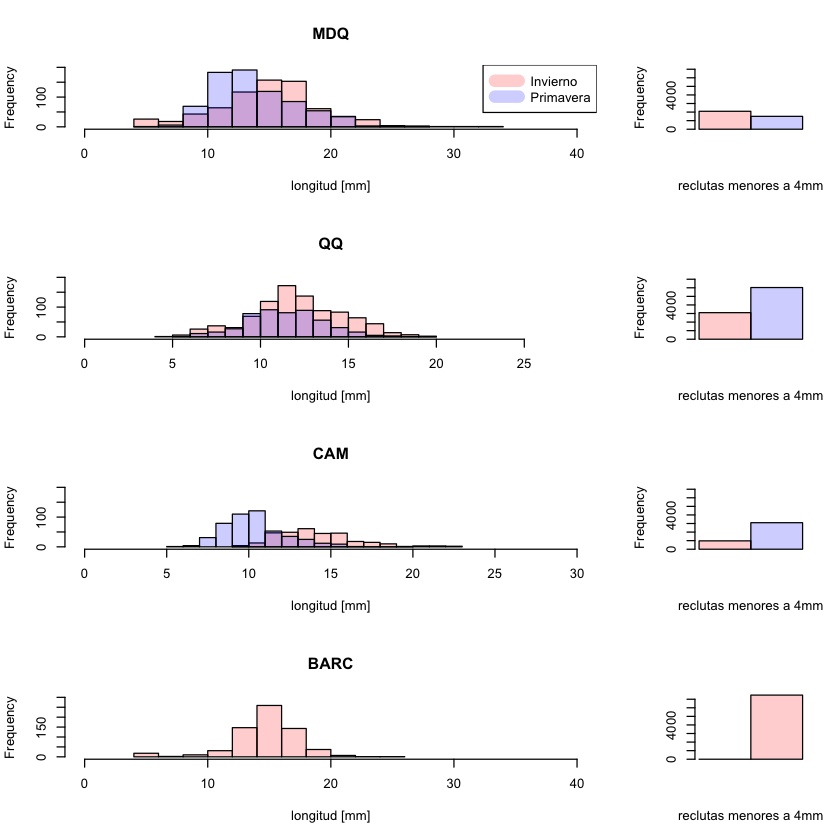

In [22]:
MDQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('QQ', data$lugar))
CAM_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('CAM', data$lugar))
BARC_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('BARC', data$lugar) )

MDQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('QQ', data$lugar))
CAM_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('CAM', data$lugar))
BARC_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('BARC', data$lugar) )

#################### RECLUTAS #######################################################
#MDQ
longitud_reclutas_primavera_MDQ  <- c(2093)
longitud_reclutas_invierno_MDQ <- c(1502)
reclutas_MDQ  <- data.frame(longitud_reclutas_primavera_MDQ, longitud_reclutas_invierno_MDQ)

#QQ
longitud_reclutas_primavera_QQ  <- c(3098)
longitud_reclutas_invierno_QQ <- c(6031)
reclutas_QQ  <- data.frame(longitud_reclutas_primavera_QQ, longitud_reclutas_invierno_QQ)

#CAM
longitud_reclutas_primavera_CAM  <- c(975)
longitud_reclutas_invierno_CAM <- c(3094)
reclutas_CAM  <- data.frame(longitud_reclutas_primavera_CAM, longitud_reclutas_invierno_CAM)

#BARC
longitud_reclutas_primavera_BARC  <- c(0)
longitud_reclutas_invierno_BARC <- c(7482)
reclutas_BARC  <- data.frame(longitud_reclutas_primavera_BARC, longitud_reclutas_invierno_BARC)

########################################################################################



layout(matrix(c(1,1,1,2,3,3,3,4,5,5,5,6,7,7,7,8), nrow = 4, ncol = 4, byrow = TRUE))

hist(MDQ_invierno$longitud, xlim=c(0,40),ylim=c(0,200), main="MDQ", col=rgb(1,0,0,0.2),xlab = "longitud [mm]")
hist(MDQ_primavera$longitud, add=T, col=rgb(0,0,1,0.2))
legend("topright", c("Invierno", "Primavera"), col=c(rgb(1,0,0,0.2),rgb(0,0,1,0.2)), lwd=10)

barplot(t(as.matrix(reclutas_MDQ)), beside=TRUE, col=c(rgb(1,0,0,0.2),rgb(0,0,1,0.2)),xlab = "reclutas menores a 4mm",ylab = "Frequency",ylim=c(0,7500))

hist(QQ_invierno$longitud, xlim=c(0,28),ylim=c(0,200), main="QQ", col=rgb(1,0,0,0.2),xlab = "longitud [mm]")
hist(QQ_primavera$longitud, add=T, col=rgb(0,0,1,0.2))
#legend("topright", c("Invierno", "Primavera"), col=c(rgb(1,0,0,0.2), rgb(0,0,1,0.2)), lwd=3)

barplot(t(as.matrix(reclutas_QQ)), beside=TRUE, col=c(rgb(1,0,0,0.2),rgb(0,0,1,0.2)),xlab = "reclutas menores a 4mm",ylab = "Frequency",ylim=c(0,7500))

hist(CAM_invierno$longitud, xlim=c(0,30),ylim=c(0,200), main="CAM", col=rgb(1,0,0,0.2),xlab = "longitud [mm]")
hist(CAM_primavera$longitud, add=T, col=rgb(0,0,1,0.2))
#legend("topright", c("Invierno", "Primavera"), col=c(rgb(1,0,0,0.2), rgb(0,0,1,0.2)), lwd=10)

barplot(t(as.matrix(reclutas_CAM)), beside=TRUE, col=c(rgb(1,0,0,0.2),rgb(0,0,1,0.2)),xlab = "reclutas menores a 4mm",ylab = "Frequency",ylim=c(0,7500))

hist(BARC_invierno$longitud, xlim=c(0,40),ylim=c(0,300), main="BARC", col=rgb(1,0,0,0.2),xlab = "longitud [mm]")
#legend("topright", c("Invierno"), col=c(rgb(1,0,0,0.2)), lwd=10)

barplot(t(as.matrix(reclutas_BARC)), beside=TRUE,col=c("white",col=rgb(1,0,0,0.2)),xlab = "reclutas menores a 4mm",ylim=c(0,7500))

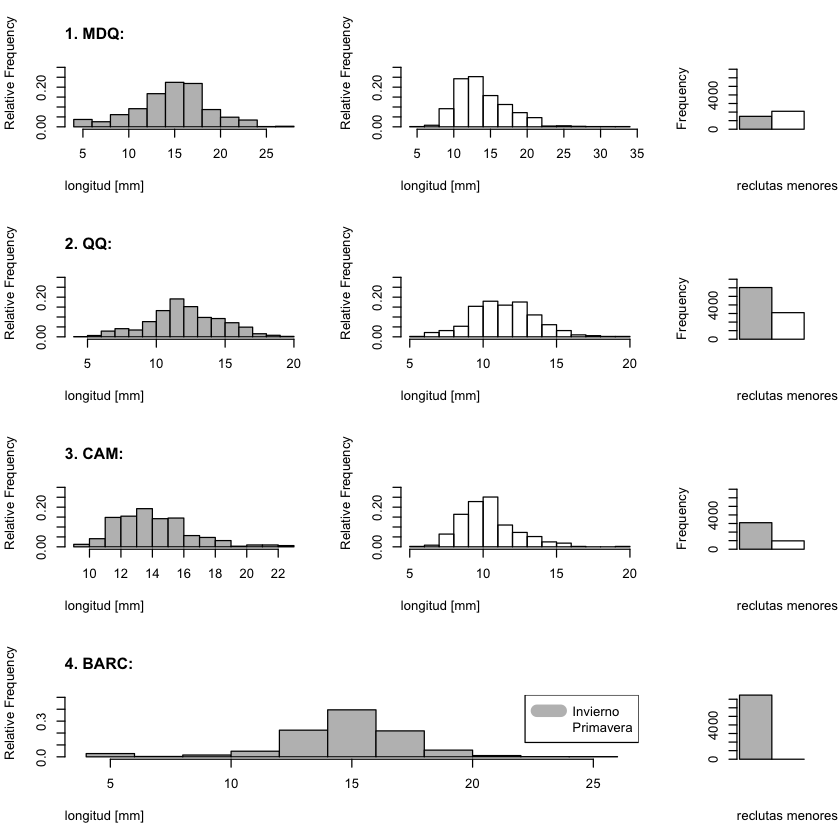

In [48]:

library(HistogramTools)

MDQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('QQ', data$lugar))
CAM_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('CAM', data$lugar))
BARC_invierno <- filter(data, Estacion=="invierno" & longitud > 0 & grepl('BARC', data$lugar) )

MDQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('MDQ', data$lugar))
QQ_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('QQ', data$lugar))
CAM_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('CAM', data$lugar))
BARC_primavera <- filter(data, Estacion=="primavera" & longitud > 0 & grepl('BARC', data$lugar) )
#################### RECLUTAS #######################################################
#MDQ
longitud_reclutas_primavera_MDQ  <- c(2093)
longitud_reclutas_invierno_MDQ <- c(1502)
reclutas_MDQ  <- data.frame(longitud_reclutas_invierno_MDQ,longitud_reclutas_primavera_MDQ)

#QQ
longitud_reclutas_primavera_QQ  <- c(3098)
longitud_reclutas_invierno_QQ <- c(6031)
reclutas_QQ  <- data.frame(longitud_reclutas_invierno_QQ,longitud_reclutas_primavera_QQ)

#CAM
longitud_reclutas_primavera_CAM  <- c(975)
longitud_reclutas_invierno_CAM <- c(3094)
reclutas_CAM  <- data.frame(longitud_reclutas_invierno_CAM,longitud_reclutas_primavera_CAM)

#BARC
longitud_reclutas_primavera_BARC  <- c(0)
longitud_reclutas_invierno_BARC <- c(7482)
reclutas_BARC  <- data.frame(longitud_reclutas_invierno_BARC,longitud_reclutas_primavera_BARC)

########################################################################################

layout(matrix(c(1,1,2,2,3,4,4,5,5,6,7,7,8,8,9,10,10,10,10,11), nrow = 4, ncol = 5, byrow = TRUE))
par(adj = 0)
PlotRelativeFrequency(hist(MDQ_invierno$longitud,plot=F),main="1. MDQ:",col="gray",xlab = "longitud [mm]",ylim=c(0,0.3))
PlotRelativeFrequency(hist(MDQ_primavera$longitud,plot=F),main="",xlab = "longitud [mm]",ylim=c(0,0.3))

barplot(t(as.matrix(reclutas_MDQ)), beside=TRUE,col=c("gray","white"),xlab = "reclutas menores a 4mm",ylab = "Frequency",ylim=c(0,7500))

PlotRelativeFrequency(hist(QQ_invierno$longitud,plot=F),main="2. QQ:",col="gray",xlab = "longitud [mm]",ylim=c(0,0.3))
PlotRelativeFrequency(hist(QQ_primavera$longitud,plot=F),main="",xlab = "longitud [mm]",ylim=c(0,0.3))


barplot(t(as.matrix(reclutas_QQ)), beside=TRUE,col=c("gray","white"),xlab = "reclutas menores a 4mm",ylab = "Frequency",ylim=c(0,7500))

PlotRelativeFrequency(hist(CAM_invierno$longitud,plot=F),main="3. CAM:",col="gray",xlab = "longitud [mm]",ylim=c(0,0.3))
PlotRelativeFrequency(hist(CAM_primavera$longitud,plot=F),main="",xlab = "longitud [mm]",ylim=c(0,0.3))

barplot(t(as.matrix(reclutas_CAM)), beside=TRUE,col=c("gray","white"),xlab = "reclutas menores a 4mm",ylab = "Frequency",ylim=c(0,7500))

PlotRelativeFrequency(hist(BARC_invierno$longitud,plot=F),main="4. BARC:",col="gray",xlab = "longitud [mm]",ylim=c(0,0.5))

legend("topright", c("Invierno", "Primavera"), col=c("gray","white"), lwd=10)

barplot(t(as.matrix(reclutas_BARC)), beside=TRUE,col=c("gray","white"),xlab = "reclutas menores a 4mm",ylim=c(0,7500))

#plot(1, type = "n", axes=FALSE, xlab="", ylab="")
#legend(x = "top",inset = 0,legend = c("Invierno", "Primavera"), 
#        col=c( "white", "gray"), lwd=5, cex=.5, horiz = TRUE)